# ***COVID-19 propagation: analysis and experimentation***
*Analysis and modeling: Louay Farah*

# Dataset

https://covid19.who.int/WHO-COVID-19-global-data.csv

# Importing libraries and modules

In [108]:
import pandas as pd                  #For data exploration and preprocessing
import numpy as np                   #For data manipulation
import matplotlib.pyplot as plt      #For data plotting

from sklearn.model_selection import train_test_split #For splitting data
from sklearn.linear_model import LinearRegression    #For creating regression models
from sklearn.preprocessing import PolynomialFeatures #For fitting features to polynomial regression model
from sklearn.metrics import mean_squared_error       #For calculating MSE
from sklearn.metrics import r2_score                 #For calculationg R-squared scores

# Loading Dataset

In [109]:
#Loading the 'WHO-COVID-19-global-data.csv' dataset that contains comma-seperated values, and saving it as a data frame called 'df'.
df=pd.read_csv('WHO-COVID-19-global-data.csv', sep=',')    

In [110]:
#Printing a part of the dataset
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
149542,2021-09-20,ZW,Zimbabwe,AFRO,199,127938,4,4567
149543,2021-09-21,ZW,Zimbabwe,AFRO,248,128186,2,4569
149544,2021-09-22,ZW,Zimbabwe,AFRO,0,128186,0,4569
149545,2021-09-23,ZW,Zimbabwe,AFRO,618,128804,23,4592


# Dataset exploration and preprocessing

In [111]:
#printing the first 5 rows of the dataset
df.head()     

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [112]:
#printing the last 5 rows of the dataset
df.tail()     

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
149542,2021-09-20,ZW,Zimbabwe,AFRO,199,127938,4,4567
149543,2021-09-21,ZW,Zimbabwe,AFRO,248,128186,2,4569
149544,2021-09-22,ZW,Zimbabwe,AFRO,0,128186,0,4569
149545,2021-09-23,ZW,Zimbabwe,AFRO,618,128804,23,4592
149546,2021-09-24,ZW,Zimbabwe,AFRO,330,129134,8,4600


In [113]:
#Getting informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149547 entries, 0 to 149546
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      149547 non-null  object
 1   Country_code       148916 non-null  object
 2   Country            149547 non-null  object
 3   WHO_region         149547 non-null  object
 4   New_cases          149547 non-null  int64 
 5   Cumulative_cases   149547 non-null  int64 
 6   New_deaths         149547 non-null  int64 
 7   Cumulative_deaths  149547 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 9.1+ MB


In [114]:
#Making sure all countries are represented with the same weight
df.iloc[:,2].value_counts().describe() 

count    237.0
mean     631.0
std        0.0
min      631.0
25%      631.0
50%      631.0
75%      631.0
max      631.0
Name: Country, dtype: float64

In [115]:
#Showing the features that contain NaN values.
df.isnull().sum()        
#We can see that only the Country_code feature contains NaN values.

Date_reported          0
Country_code         631
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [116]:
#Making sure all countries have the same number of observations.
result=False
l=df.iloc[:,2].value_counts().tolist()
if len(l)>0:
  result = all(elem == l[0] for elem in l)

assert result    

In [117]:
df[df.iloc[:,1].isnull()].iloc[:,2].value_counts()
#Namibia is the only country without a country code.

Namibia    631
Name: Country, dtype: int64

In [118]:
#Making sure NM is not used as a country code.
df[df.iloc[:,1]=='NM']   

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths


In [119]:
#Replacing NaN values in Namibia Country_code feature by 'NM'
df.fillna('NM', inplace=True)
df[df.iloc[:,2]=='Namibia'].iloc[:,1]

90233    NM
90234    NM
90235    NM
90236    NM
90237    NM
         ..
90859    NM
90860    NM
90861    NM
90862    NM
90863    NM
Name: Country_code, Length: 631, dtype: object

In [120]:
#Counting the number of regions and countries where the observations were made.
print(df.iloc[:,3].value_counts(),'\n')
print('Observations have been made on {0} regions and {1} countries.'.format(len(df.iloc[:,3].value_counts().index), len(df.iloc[:,2].value_counts().index)))
countries=len(df.iloc[:,2].value_counts().index)
obs=(len(df)//countries)
print('Number of observations: {}'.format(obs))

EURO     39122
AMRO     35336
AFRO     31550
WPRO     22085
EMRO     13882
SEARO     6941
Other      631
Name: WHO_region, dtype: int64 

Observations have been made on 7 regions and 237 countries.
Number of observations: 631


In [121]:
#Making sure the is no more NaN values in the dataset.
df.isnull().sum().sum()   

0

# 1: Creating COVID-19 Global prediction models

**Understanding data, preprocessing and Visualization**

In [122]:
#Printing the first 5 rows of the dataset.
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [123]:
#creating a data frame called 'df_nc' to store New_cases feature evolution.
df_nc=df.iloc[:, [4,0]]

In [124]:
#Printing the first 5 rows of 'df_nc'
df_nc.head()

,New_cases,Date_reported
0,0,2020-01-03
1,0,2020-01-04
2,0,2020-01-05
3,0,2020-01-06
4,0,2020-01-07


In [125]:
#Getting a description of 'df_nc'.
df_nc.describe()

,New_cases
count,149547.000000
mean,1540.776151
std,9626.331461
min,-32952.000000
25%,0.000000
50%,12.000000
75%,366.000000
max,414188.000000


In [126]:
#creating a data frame called 'df_cc' to store Cumulative_cases feature evolution.
df_cc=df.iloc[:, [5,0]]

In [127]:
#Printing the first 5 rows of 'df_cc'
df_cc.head()

,Cumulative_cases,Date_reported
0,0,2020-01-03
1,0,2020-01-04
2,0,2020-01-05
3,0,2020-01-06
4,0,2020-01-07


In [128]:
#Getting a description of 'df_cc'.
df_cc.describe()

,Cumulative_cases
count,1.495470e+05
mean,3.301634e+05
std,1.950743e+06
min,0.000000e+00
25%,3.800000e+01
50%,4.329000e+03
75%,7.892150e+04
max,4.230095e+07


In [129]:
#creating a data frame called 'df_nd' to store New_deaths feature evolution.
df_nd=df.iloc[:, [6,0]]

In [130]:
#Printing the first 5 rows of 'df_nd'
df_nd.head()

,New_deaths,Date_reported
0,0,2020-01-03
1,0,2020-01-04
2,0,2020-01-05
3,0,2020-01-06
4,0,2020-01-07


In [131]:
#Getting a description of 'df_nd'.
df_nd.describe()

,New_deaths
count,149547.000000
mean,31.594589
std,171.096376
min,-60.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,8786.000000


In [132]:
#creating a data frame called 'df_cd' to store Cumulative_deaths feature evolution.
df_cd=df.iloc[:, [7,0]]

In [133]:
#Printing the first 5 rows of 'df_cd'
df_cd.head()

,Cumulative_deaths,Date_reported
0,0,2020-01-03
1,0,2020-01-04
2,0,2020-01-05
3,0,2020-01-06
4,0,2020-01-07


In [134]:
#Getting a description of 'df_nd'.
df_cd.describe()

,Cumulative_deaths
count,149547.000000
mean,7607.098471
std,38383.833747
min,0.000000
25%,0.000000
50%,66.000000
75%,1303.000000
max,677323.000000


In [135]:
#Writing a function that, given a data frame, gets the sum of cases or deaths of all countries, stores the information in a new data frame, and returns it. 
def sumCasesOrDeaths(df):
  i=0
  df1=df.iloc[i:i+obs,:]
  i+=obs
  for country in range(1,countries):
    value=0
    d={}
    for key in range(i,i+obs):
      d[key]=value
      value+=1
    df1=df1+(df.iloc[i:i+obs,:].rename(index=d))
    i+=obs
  return df1  

In [136]:
#Creating the new 'df_nc' dataframe using the sumCasesOrDeaths function.
df_nc1=sumCasesOrDeaths(df_nc)
df_nc1=df_nc1.drop('Date_reported', axis = 1)
df_nc1['day_index']=[i for i in range(1,obs+1)]

In [137]:
print(df_nc1)

     New_cases  day_index
0            0          1
1            1          2
2            0          3
3            3          4
4            0          5
..         ...        ...
626     484666        627
627     326420        628
628     563294        629
629     538540        630
630     483898        631

[631 rows x 2 columns]


In [138]:
#Creating the new 'df_cc' dataframe using the sumCasesOrDeaths function.
df_cc1=sumCasesOrDeaths(df_cc)
df_cc1=df_cc1.drop('Date_reported', axis = 1)
df_cc1['day_index']=[i for i in range(1,obs+1)]

In [139]:
print(df_cc1)

     Cumulative_cases  day_index
0                   0          1
1                   1          2
2                   1          3
3                   4          4
4                   4          5
..                ...        ...
626         228506299        627
627         228832719        628
628         229396013        629
629         229934553        630
630         230418451        631

[631 rows x 2 columns]


In [140]:
#Creating the new 'df_nd' dataframe using the sumCasesOrDeaths function.
df_nd1=sumCasesOrDeaths(df_nd)
df_nd1=df_nd1.drop('Date_reported', axis = 1)
df_nd1['day_index']=[i for i in range(1,obs+1)]

In [141]:
print(df_nd1)

     New_deaths  day_index
0             0          1
1             0          2
2             0          3
3             0          4
4             0          5
..          ...        ...
626        6938        627
627        5205        628
628        8068        629
629       11013        630
630        8225        631

[631 rows x 2 columns]


In [142]:
#Creating the new 'df_cd' dataframe using the sumCasesOrDeaths function.
df_cd1=sumCasesOrDeaths(df_cd)
df_cd1=df_cd1.drop('Date_reported', axis = 1)
df_cd1['day_index']=[i for i in range(1,obs+1)]

In [143]:
print(df_cd1)

     Cumulative_deaths  day_index
0                    0          1
1                    0          2
2                    0          3
3                    0          4
4                    0          5
..                 ...        ...
626            4692365        627
627            4697570        628
628            4705638        629
629            4716651        630
630            4724876        631

[631 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


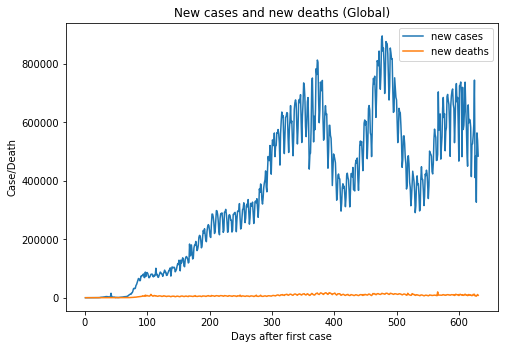

In [144]:
#Plotting New_cases and New_deaths
fig1=plt.figure()
ax1=fig1.add_axes([0,0,1,1])
ax2=fig1.add_axes([0,0,1,1])
ax1.plot(df_nc1['day_index'],df_nc1.iloc[:,0],label='new cases')
ax2.plot(df_nd1['day_index'],df_nd1.iloc[:,0],label='new deaths')
plt.title('New cases and new deaths (Global)')
plt.xlabel('Days after first case')
plt.ylabel('Case/Death')
ax1.legend()
ax2.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


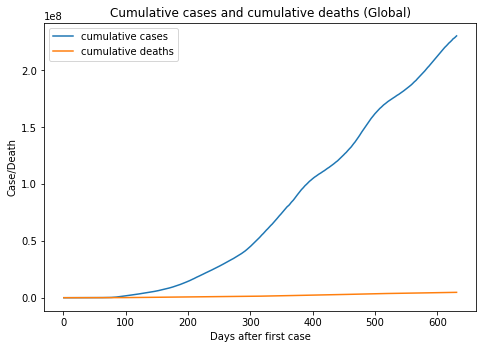

In [145]:
#Plotting Cumulative_cases and Cumulative_deaths
fig2=plt.figure()
ax3=fig2.add_axes([0,0,1,1])
ax4=fig2.add_axes([0,0,1,1])
ax3.plot(df_cc1['day_index'],df_cc1.iloc[:,0],label='cumulative cases')
ax4.plot(df_cd1['day_index'],df_cd1.iloc[:,0],label='cumulative deaths')
plt.title('Cumulative cases and cumulative deaths (Global)')
plt.xlabel('Days after first case')
plt.ylabel('Case/Death')
ax3.legend()
ax4.legend()

**Choosing the right algorithm:**
According to the graphs, there is a polynomial relationship between day_index feature and the targets: New_cases, New_deaths, Cumulative_cases and Cumulative_deaths.

**Modeling:**

*new cases*

In [146]:
#choosing the target and the feature
x_nc=df_nc1.iloc[:,[1]].values
y_nc=df_nc1.iloc[:,[0]].values

In [147]:
#splitting the data
x_train_nc,x_test_nc,y_train_nc,y_test_nc=train_test_split(x_nc,y_nc,test_size=0.30,random_state=40)

In [148]:
#fitting the feature
poly_nc=PolynomialFeatures(degree=6)

x_train_nc_fit=poly_nc.fit_transform(x_train_nc)
x_test_nc_fit=poly_nc.fit_transform(x_test_nc)

In [149]:
#creating the regression model
model_nc=LinearRegression()
model_nc.fit(x_train_nc_fit, y_train_nc)

print('score:')
model_nc.score(x_test_nc_fit, y_test_nc)

score:


0.799872827066956

In [150]:
#calculating metrics
pred_nc=model_nc.predict(x_test_nc_fit)
print("MSE:", mean_squared_error(y_test_nc,pred_nc))
print("R2:", r2_score(y_test_nc,pred_nc))

MSE: 13165648755.385094
R2: 0.799872827066956


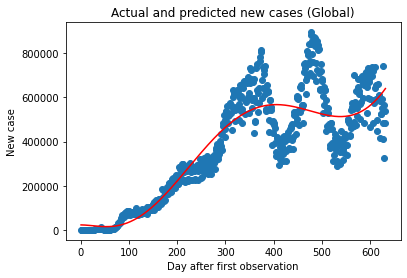

In [151]:
#plotting the model
fig3=plt.figure()
plt.scatter(x_nc,y_nc)
plt.title("Actual and predicted new cases (Global)")
plt.xlabel("Day after first observation")
plt.ylabel("New case")
plt.plot(x_nc, model_nc.predict(poly_nc.fit_transform(x_nc)), color="r")

*Cumulative cases*

In [152]:
#choosing the target and the feature
x_cc=df_cc1.iloc[:,[1]].values
y_cc=df_cc1.iloc[:,[0]].values

In [153]:
#splitting the data
x_train_cc,x_test_cc,y_train_cc,y_test_cc=train_test_split(x_cc,y_cc,test_size=0.30,random_state=40)

In [154]:
#fitting the feature
poly_cc=PolynomialFeatures(degree=2)

x_train_cc_fit=poly_cc.fit_transform(x_train_cc)
x_test_cc_fit=poly_cc.fit_transform(x_test_cc)

In [155]:
#creating the regression model
model_cc=LinearRegression()
model_cc.fit(x_train_cc_fit, y_train_cc)

print('score:')
model_cc.score(x_test_cc_fit, y_test_cc)

score:


0.9934073302434977

In [156]:
#calculating metrics
pred_cc=model_cc.predict(x_test_cc_fit)
print("MSE:", mean_squared_error(y_test_cc,pred_cc))
print("R2:", r2_score(y_test_cc,pred_cc))

MSE: 35903590655839.17
R2: 0.9934073302434977


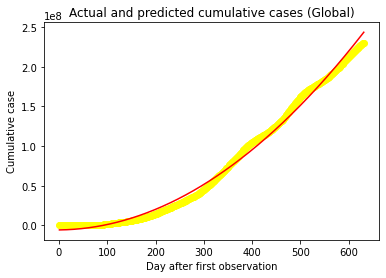

In [157]:
#plotting the model
fig4=plt.figure()
plt.scatter(x_cc,y_cc, c='yellow')
plt.title("Actual and predicted cumulative cases (Global)")
plt.xlabel("Day after first observation")
plt.ylabel("Cumulative case")
plt.plot(x_cc, model_cc.predict(poly_cc.fit_transform(x_cc)), color="r")

*new deaths*

In [158]:
#choosing the target and the feature
x_nd=df_nd1.iloc[:,[1]].values
y_nd=df_nd1.iloc[:,[0]].values

In [159]:
#splitting the data
x_train_nd,x_test_nd,y_train_nd,y_test_nd=train_test_split(x_nd,y_nd,test_size=0.30,random_state=40)

In [160]:
#fitting the feature
poly_nd=PolynomialFeatures(degree=6)

x_train_nd_fit=poly_nd.fit_transform(x_train_nd)
x_test_nd_fit=poly_nd.fit_transform(x_test_nd)

In [161]:
#creating the regression model
model_nd=LinearRegression()
model_nd.fit(x_train_nd_fit, y_train_nd)

print('score:')
model_nd.score(x_test_nd_fit, y_test_nd)

score:


0.7794566470850803

In [162]:
#calculating metrics
pred_nd=model_nd.predict(x_test_nd_fit)
print("MSE:", mean_squared_error(y_test_nd,pred_nd))
print("R2:", r2_score(y_test_nd,pred_nd))

MSE: 4078578.241195019
R2: 0.7794566470850803


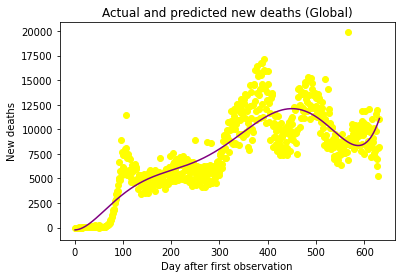

In [163]:
#plotting the model
fig5=plt.figure()
plt.scatter(x_nd,y_nd, c='yellow')
plt.title("Actual and predicted new deaths (Global)")
plt.xlabel("Day after first observation")
plt.ylabel("New deaths")
plt.plot(x_nd, model_nd.predict(poly_nd.fit_transform(x_nd)), color="purple")

*Cumulative deaths*

In [164]:
#choosing the target and the feature
x_cd=df_cd1.iloc[:,[1]].values
y_cd=df_cd1.iloc[:,[0]].values

In [165]:
#splitting the data
x_train_cd,x_test_cd,y_train_cd,y_test_cd=train_test_split(x_cd,y_cd,test_size=0.30,random_state=40)

In [166]:
#fitting the feature
poly_cd=PolynomialFeatures(degree=2)

x_train_cd_fit=poly_cd.fit_transform(x_train_cd)
x_test_cd_fit=poly_cd.fit_transform(x_test_cd)

In [167]:
#creating the regression model
model_cd=LinearRegression()
model_cd.fit(x_train_cd_fit, y_train_cd)

print('score:')
model_cd.score(x_test_cd_fit, y_test_cd)

score:


0.9958290331754541

In [168]:
#calculating metrics
pred_cd=model_cd.predict(x_test_cd_fit)
print("MSE:", mean_squared_error(y_test_cd,pred_cd))
print("R2:", r2_score(y_test_cd,pred_cd))

MSE: 9417536371.702742
R2: 0.995829033175454


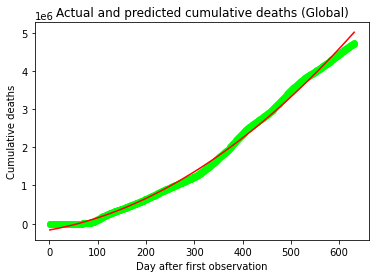

In [169]:
#plotting the model
fig6=plt.figure()
plt.scatter(x_cd,y_cd, c='lime')
plt.title("Actual and predicted cumulative deaths (Global)")
plt.xlabel("Day after first observation")
plt.ylabel("Cumulative deaths")
plt.plot(x_cd, model_cd.predict(poly_cd.fit_transform(x_cd)), color="red")

# 2: Creating COVID-19 local prediction models (Tunisia)

**Understanding data, preprocessing and Visualization**

In [170]:
#Printing the first 5 rows of the dataset
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [171]:
#Creating a new data frame called 'dft' that contains information about COVID-19 propagation in Tunisia.
#Printing some rows of 'dft'
dft=df[df.iloc[:,1]=='TN']
dft

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
136927,2020-01-03,TN,Tunisia,EMRO,0,0,0,0
136928,2020-01-04,TN,Tunisia,EMRO,0,0,0,0
136929,2020-01-05,TN,Tunisia,EMRO,0,0,0,0
136930,2020-01-06,TN,Tunisia,EMRO,0,0,0,0
136931,2020-01-07,TN,Tunisia,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
137553,2021-09-20,TN,Tunisia,EMRO,472,700400,37,24527
137554,2021-09-21,TN,Tunisia,EMRO,407,700807,26,24553
137555,2021-09-22,TN,Tunisia,EMRO,1013,701820,81,24634
137556,2021-09-23,TN,Tunisia,EMRO,683,702503,20,24654


In [172]:
#Creating two variables 'start' and 'stop' that represent the first data frame index and the last data frame index, respectively.
start=dft.index[0]
stop=dft.index[-1]

In [173]:
#Creating a map called 'dt'.
value_t=0
dt={}
for key in range(start, (stop+1)):
  dt[key]=value_t
  value_t+=1

In [174]:
#changing 'dft' indexes, by the mapped sequence contained in 'dt'.
dft=dft.rename(index=dt)

In [175]:
#Creating a new feature called day_index.
dft['day_index']=[i for i in range(1,obs+1)]

In [176]:
#creating a data frame called 'dft_nc' to store New_cases feature evolution in Tunisia.
dft_nc=dft.iloc[:,[4,8]]

In [177]:
print(dft_nc)

     New_cases  day_index
0            0          1
1            0          2
2            0          3
3            0          4
4            0          5
..         ...        ...
626        472        627
627        407        628
628       1013        629
629        683        630
630          0        631

[631 rows x 2 columns]


In [178]:
#Getting a description of 'dft_nc'.
dft_nc.describe()

,New_cases,day_index
count,631.000000,631.00000
mean,1113.316957,316.00000
std,1545.552672,182.29829
min,-5.000000,1.00000
25%,5.000000,158.50000
50%,683.000000,316.00000
75%,1615.500000,473.50000
max,9823.000000,631.00000


In [179]:
#creating a data frame called 'dft_cc' to store Cumulative_cases feature evolution in Tunisia.
dft_cc=dft.iloc[:,[5,8]]

In [180]:
print(dft_cc)

     Cumulative_cases  day_index
0                   0          1
1                   0          2
2                   0          3
3                   0          4
4                   0          5
..                ...        ...
626            700400        627
627            700807        628
628            701820        629
629            702503        630
630            702503        631

[631 rows x 2 columns]


In [181]:
#Getting a description of 'dft_cc'.
dft_cc.describe()

,Cumulative_cases,day_index
count,631.000000,631.00000
mean,171757.529319,316.00000
std,210643.723360,182.29829
min,0.000000,1.00000
25%,1087.000000,158.50000
50%,76106.000000,316.00000
75%,286275.500000,473.50000
max,702503.000000,631.00000


In [182]:
#creating a data frame called 'dft_nd' to store New_deaths feature evolution in Tunisia.
dft_nd=dft.iloc[:,[6,8]]

In [183]:
print(dft_nd)

     New_deaths  day_index
0             0          1
1             0          2
2             0          3
3             0          4
4             0          5
..          ...        ...
626          37        627
627          26        628
628          81        629
629          20        630
630           0        631

[631 rows x 2 columns]


In [184]:
#Getting a description of 'dft_nd'.
dft_nd.describe()

,New_deaths,day_index
count,631.000000,631.00000
mean,39.071315,316.00000
std,49.898751,182.29829
min,0.000000,1.00000
25%,0.000000,158.50000
50%,27.000000,316.00000
75%,63.000000,473.50000
max,348.000000,631.00000


In [185]:
#creating a data frame called 'dft_cd' to store Cumulative_deaths feature evolution in Tunisia.
dft_cd=dft.iloc[:,[7,8]]

In [186]:
print(dft_cd)

     Cumulative_deaths  day_index
0                    0          1
1                    0          2
2                    0          3
3                    0          4
4                    0          5
..                 ...        ...
626              24527        627
627              24553        628
628              24634        629
629              24654        630
630              24654        631

[631 rows x 2 columns]


In [187]:
#Getting a description of 'dft_cd'.
dft_cd.describe()

,Cumulative_deaths,day_index
count,631.000000,631.00000
mean,5887.274168,316.00000
std,7363.916295,182.29829
min,0.000000,1.00000
25%,49.000000,158.50000
50%,2151.000000,316.00000
75%,9804.000000,473.50000
max,24654.000000,631.00000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


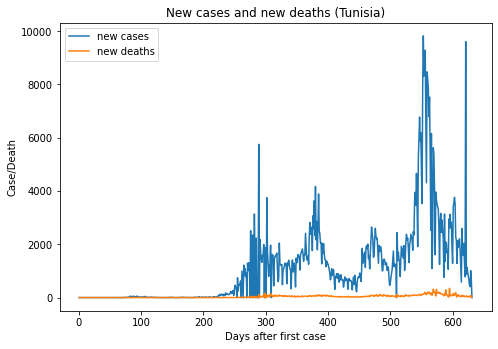

In [188]:
#Plotting New_cases and New_deaths
fig7=plt.figure()
ax5=fig7.add_axes([0,0,1,1])
ax6=fig7.add_axes([0,0,1,1])
ax5.plot(dft_nc['day_index'],dft_nc.iloc[:,0],label='new cases')
ax6.plot(dft_nd['day_index'],dft_nd.iloc[:,0],label='new deaths')
plt.title('New cases and new deaths (Tunisia)')
plt.xlabel('Days after first case')
plt.ylabel('Case/Death')
ax5.legend()
ax6.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


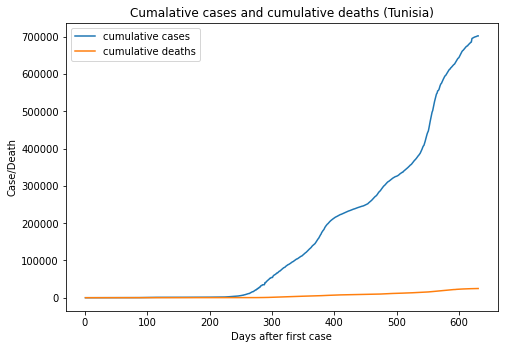

In [189]:
#Plotting Cumulative_cases and Cumulative_deaths
fig8=plt.figure()
ax7=fig8.add_axes([0,0,1,1])
ax8=fig8.add_axes([0,0,1,1])
ax7.plot(dft_cc['day_index'],dft_cc.iloc[:,0],label='cumulative cases')
ax8.plot(dft_cd['day_index'],dft_cd.iloc[:,0],label='cumulative deaths')
plt.title('Cumalative cases and cumulative deaths (Tunisia)')
plt.xlabel('Days after first case')
plt.ylabel('Case/Death')
ax7.legend()
ax8.legend()

**Choosing the right algorithm:**
According to the graphs, there is a polynomial relationship between day_index feature and the targets: New_cases, New_deaths, Cumulative_cases and Cumulative_deaths.

**Modeling**

*new cases*

In [190]:
#choosing the target and the feature
xt_nc=dft_nc.iloc[:,[1]].values
yt_nc=dft_nc.iloc[:,[0]].values

In [191]:
#splitting the data
xt_train_nc,xt_test_nc,yt_train_nc,yt_test_nc=train_test_split(xt_nc,yt_nc,test_size=0.30,random_state=40)

In [192]:
#fitting the feature
polyt_nc=PolynomialFeatures(degree=4)

xt_train_nc_fit=polyt_nc.fit_transform(xt_train_nc)
xt_test_nc_fit=polyt_nc.fit_transform(xt_test_nc)

In [193]:
#creating the regression model
modelt_nc=LinearRegression()
modelt_nc.fit(xt_train_nc_fit, yt_train_nc)

print('score:')
modelt_nc.score(xt_test_nc_fit, yt_test_nc)

score:


0.42698594101345744

In [194]:
#calculating metrics
predt_nc=modelt_nc.predict(xt_test_nc_fit)
print("MSE:", mean_squared_error(yt_test_nc,predt_nc))
print("R2:", r2_score(yt_test_nc,predt_nc))

MSE: 1360560.5318450707
R2: 0.42698594101345744


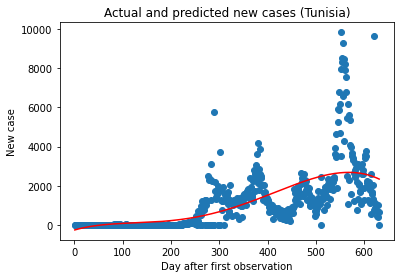

In [195]:
#plotting the model
fig9=plt.figure()
plt.scatter(xt_nc,yt_nc)
plt.title("Actual and predicted new cases (Tunisia)")
plt.xlabel("Day after first observation")
plt.ylabel("New case")
plt.plot(xt_nc, modelt_nc.predict(polyt_nc.fit_transform(xt_nc)), color="r")

*cumulative cases*

In [196]:
#choosing the target and the feature
xt_cc=dft_cc.iloc[:,[1]].values
yt_cc=dft_cc.iloc[:,[0]].values

In [197]:
#splitting the data
xt_train_cc,xt_test_cc,yt_train_cc,yt_test_cc=train_test_split(xt_cc,yt_cc,test_size=0.30,random_state=40)

In [198]:
#fitting the feature
polyt_cc=PolynomialFeatures(degree=2)

xt_train_cc_fit=polyt_cc.fit_transform(xt_train_cc)
xt_test_cc_fit=polyt_cc.fit_transform(xt_test_cc)

In [199]:
#creating the regression model
modelt_cc=LinearRegression()
modelt_cc.fit(xt_train_cc_fit, yt_train_cc)

print('score:')
modelt_cc.score(xt_test_cc_fit, yt_test_cc)

score:


0.9880429176558118

In [200]:
#calculating metrics
predt_cc=modelt_cc.predict(xt_test_cc_fit)
print("MSE:", mean_squared_error(yt_test_cc,predt_cc))
print("R2:", r2_score(yt_test_cc,predt_cc))

MSE: 517231593.47860366
R2: 0.9880429176558118


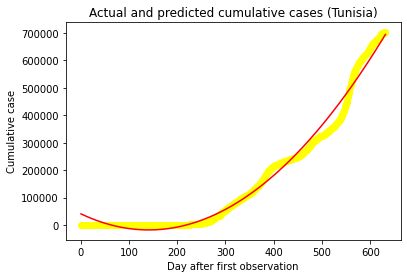

In [201]:
#plotting the model
fig10=plt.figure()
plt.scatter(xt_cc,yt_cc, c='yellow')
plt.title("Actual and predicted cumulative cases (Tunisia)")
plt.xlabel("Day after first observation")
plt.ylabel("Cumulative case")
plt.plot(xt_cc, modelt_cc.predict(polyt_cc.fit_transform(xt_cc)), color="r")

*new deaths*

In [202]:
#choosing the target and the feature
xt_nd=dft_nd.iloc[:,[1]].values
yt_nd=dft_nd.iloc[:,[0]].values

In [203]:
#splitting the data
xt_train_nd,xt_test_nd,yt_train_nd,yt_test_nd=train_test_split(xt_nd,yt_nd,test_size=0.30,random_state=40)

In [204]:
#fitting the feature
polyt_nd=PolynomialFeatures(degree=4)

xt_train_nd_fit=polyt_nd.fit_transform(xt_train_nd)
xt_test_nd_fit=polyt_nd.fit_transform(xt_test_nd)

In [205]:
#creating the regression model
modelt_nd=LinearRegression()
modelt_nd.fit(xt_train_nd_fit, yt_train_nd)

print('score:')
modelt_nd.score(xt_test_nd_fit, yt_test_nd)

score:


0.5368376847840144

In [206]:
#calculating metrics
predt_nd=modelt_nd.predict(xt_test_nd_fit)
print("MSE:", mean_squared_error(yt_test_nd,predt_nd))
print("R2:", r2_score(yt_test_nd,predt_nd))

MSE: 1110.7019271107229
R2: 0.5368376847840144


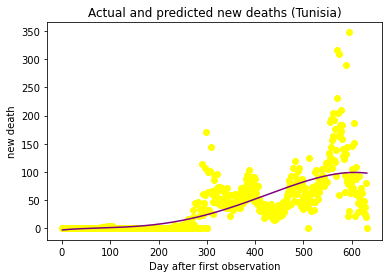

In [207]:
#plotting the model
fig11=plt.figure()
plt.scatter(xt_nd,yt_nd, c='yellow')
plt.title("Actual and predicted new deaths (Tunisia)")
plt.xlabel("Day after first observation")
plt.ylabel("new death")
plt.plot(xt_nd, modelt_nd.predict(polyt_nd.fit_transform(xt_nd)), color="purple")

*cumulative deaths*

In [208]:
#choosing the target and the feature
xt_cd=dft_cd.iloc[:,[1]].values
yt_cd=dft_cd.iloc[:,[0]].values

In [209]:
#splitting the data
xt_train_cd,xt_test_cd,yt_train_cd,yt_test_cd=train_test_split(xt_cd,yt_cd,test_size=0.30,random_state=40)

In [210]:
#fitting the feature
polyt_cd=PolynomialFeatures(degree=2)

xt_train_cd_fit=polyt_cd.fit_transform(xt_train_cd)
xt_test_cd_fit=polyt_cd.fit_transform(xt_test_cd)

In [211]:
#creating the regression model
modelt_cd=LinearRegression()
modelt_cd.fit(xt_train_cd_fit, yt_train_cd)

print('score:')
modelt_cd.score(xt_test_cd_fit, yt_test_cd)

score:


0.988928150967059

In [212]:
#calculating metrics
predt_cd=modelt_cd.predict(xt_test_cd_fit)
print("MSE:", mean_squared_error(yt_test_cd,predt_cd))
print("R2:", r2_score(yt_test_cd,predt_cd))

MSE: 588419.0665868205
R2: 0.9889281509670589


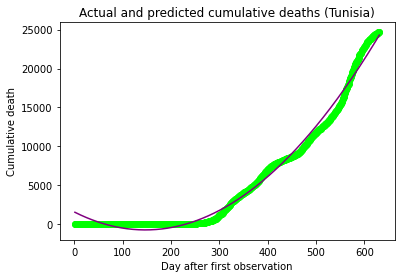

In [213]:
#plotting the model
fig12=plt.figure()
plt.scatter(xt_cd,yt_cd, c='lime')
plt.title("Actual and predicted cumulative deaths (Tunisia)")
plt.xlabel("Day after first observation")
plt.ylabel("Cumulative death")
plt.plot(xt_cd, modelt_cd.predict(polyt_cd.fit_transform(xt_cd)), color="purple")

# **Experimentation**

In [214]:
print(90*'-')
print('COVID-19 Propagation predictor'.center(85))
print(90*'-', end='\n\n\n')

print(38*'-', 'DESCRIPTION', 39*'-', end='\n\n')
print("""Given a choice between global (g) and Tunisia (t) and an integer n,
the predictor uses a set of regression models in order to:
>>Predict new cases n days after the day when the last observation was made.
>>Predict Cumulative cases n days after the day when the last observation was made.
>>Predict new deaths n days after the day when the last observation was made.
>>Predict cumulative deaths n days after the day when the last observation was made.

NOTE: Download and use the latest dataset using the link:'https://covid19.who.int/WHO-COVID-19-global-data.csv' 
NOTE: In order to get the most precise prediction, n should be between 1 and 30 inclusive.
""", end='\n\n')
print(39*'-', 'PREDICTION', 39*'-', end='\n\n')
date = df.iloc[-1, 0]
print('Last observation was made on: {0}.'.format(date), end='\n\n')

decision=0
while True:
  area=input("Enter g for global Covid-19 prediction, or t for local Covid-19 prediction in Tunisia: ")
  if area in 'gG':
    decision=1
    break
  elif area in 'tT':
    decision=2
    break
  else:
    print('Please, enter a valid character.')
    continue

while True:
  try:
    n=int(input("Enter an integer n where n = number of days after last observation day: "))
    break
  except:
    print('Please, enter a valid integer.')
    continue

if n<1 or n>30:
  print("WARNING: The integer n should be between 1 and 30 inclusive.")
print('\n\n')

if decision==1:
  print('GLOBAL COVID-19 PREDICTION:')
  print('New cases after {0} days from last observation: {1}'.format(n, int(model_nc.predict(poly_nc.fit_transform([[obs+n]])))))
  print('New deaths after {0} days from last observation: {1}'.format(n, int(model_nd.predict(poly_nd.fit_transform([[obs+n]])))))
  print('Cumulative cases after {0} days from last observation: {1} Millions'.format(n, round(int(model_cc.predict(poly_cc.fit_transform([[obs+n]])))/1000000,2)))
  print('Cumulative deaths after {0} days from last observation: {1}K'.format(n, round(int(model_cd.predict(poly_cd.fit_transform([[obs+n]])))/1000,2)))
else:
  print('LOCAL COVID-19 PREDICTION (TUNISIA):')
  print('New cases after {0} days from last observation: {1}'.format(n, int(modelt_nc.predict(polyt_nc.fit_transform([[obs+n]])))))
  print('New deaths after {0} days from last observation: {1}'.format(n, int(modelt_nd.predict(polyt_nd.fit_transform([[obs+n]])))))
  print('Cumulative cases after {0} days from last observation: {1}'.format(n, int(modelt_cc.predict(polyt_cc.fit_transform([[obs+n]])))))
  print('Cumulative deaths after {0} days from last observation: {1}'.format(n, int(modelt_cd.predict(polyt_cd.fit_transform([[obs+n]])))))

------------------------------------------------------------------------------------------
                            COVID-19 Propagation predictor                           
------------------------------------------------------------------------------------------


-------------------------------------- DESCRIPTION ---------------------------------------

Given a choice between global (g) and Tunisia (t) and an integer n,
the predictor uses a set of regression models in order to:
>>Predict new cases n days after the day when the last observation was made.
>>Predict Cumulative cases n days after the day when the last observation was made.
>>Predict new deaths n days after the day when the last observation was made.
>>Predict cumulative deaths n days after the day when the last observation was made.

NOTE: Download and use the latest dataset using the link:'https://covid19.who.int/WHO-COVID-19-global-data.csv' 
NOTE: In order to get the most precise prediction, n should be between 1 